# Stardew Valley Crop Profitability EDA Notebook

In [25]:
# EDA: Most Profitable Crops Per Season
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
# Load the dataset
import pandas as pd


df = pd.read_csv('./crops.csv')


In [26]:
# Load Dataset
df = pd.read_csv("crops.csv")
df.head()

,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Purchase Source,Name,Season,Sell Price (Seed),Regrowth Time (In Days),XP
0,Jazz Seeds,50,62,75,100,7,"[""Pierre's"", 'JojaMart']",Blue Jazz,['Spring'],15,NaN,NaN
1,Carrot Seeds,35,43,52,70,3,['Foraging'],Carrot,['Spring'],15,NaN,NaN
2,Cauliflower Seeds,175,218,262,350,12,"[""Pierre's"", 'JojaMart']",Cauliflower,['Spring'],40,NaN,NaN
3,Coffee Bean,15,18,22,30,10,"['Traveling Cart', 'Dust Sprite']",NaN,"['Spring', 'Summer']",Coffee Bean,2.0,NaN
4,Garlic Seeds,60,75,90,120,4,"[""Pierre's""]",Garlic,['Spring'],20,NaN,NaN


In [27]:
# Data Cleaning
# Convert 'Season' column from string to list
df['Season'] = df['Season'].apply(ast.literal_eval)

# Drop missing crop names and prices
df_clean = df.dropna(subset=['Name', 'Price (Regular)', 'Sell Price (Seed)'])

# Convert Sell Price to numeric
df_clean['Sell Price (Seed)'] = pd.to_numeric(df_clean['Sell Price (Seed)'], errors='coerce')

# Calculate Profit
df_clean['Profit'] = df_clean['Sell Price (Seed)'] - df_clean['Price (Regular)']

# Explode seasons into separate rows
df_expanded = df_clean.explode('Season')

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_20925/3062485285.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sell Price (Seed)'] = pd.to_numeric(df_clean['Sell Price (Seed)'], errors='coerce')
/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_20925/3062485285.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Profit'] = df_clean['Sell Price (Seed)'] - df_clean['Price (Regular)']


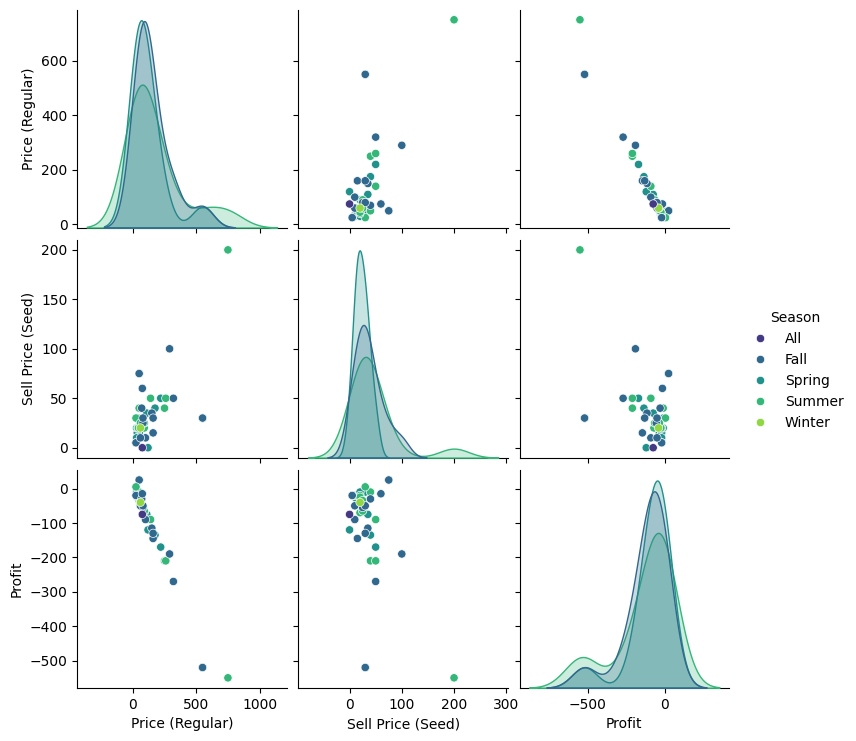

In [28]:
# Ensure 'Season' column is categorical and handle missing values
df_expanded['Season'] = df_expanded['Season'].astype('category')

# Drop rows with missing values in numerical columns used in the pairplot
df_expanded = df_expanded.dropna(subset=['Price (Regular)', 'Sell Price (Seed)', 'Profit'])

# Recreate the pairplot with corrected data
sns.pairplot(df_expanded, vars=['Price (Regular)', 'Sell Price (Seed)', 'Profit'], hue='Season', palette='viridis')
plt.show()

In [29]:
# Top 3 Profitable Crops per Season
top_crops_per_season = df_expanded.groupby('Season').apply(
    lambda x: x.sort_values(by='Profit', ascending=False).head(6)
).reset_index(drop=True)

top_crops_per_season

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_20925/3000709003.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_crops_per_season = df_expanded.groupby('Season').apply(


,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Purchase Source,Name,Season,Sell Price (Seed),Regrowth Time (In Days),XP,Profit
0,Cactus Seeds,75,93,112,150,12,['Oasis'],Cactus Fruit,All,0.0,3.0,NaN,-75.0
1,Corn Seeds,50,62,75,100,14,"[""Pierre's"", 'JojaMart']",Corn,Fall,75.0,4.0,NaN,25.0
2,Cranberry Seeds,75,93,112,150,7,"[""Pierre's"", 'JojaMart']",Cranberries,Fall,60.0,5.0,NaN,-15.0
3,Wheat Seeds,25,31,37,50,4,"[""Pierre's"", 'JojaMart']",Wheat,Fall,5.0,NaN,NaN,-20.0
4,Broccoli Seeds,70,87,105,140,8,['Foraging'],Broccoli,Fall,40.0,4.0,NaN,-30.0
5,Eggplant Seeds,60,75,90,120,5,"[""Pierre's"", 'JojaMart']",Eggplant,Fall,10.0,5.0,NaN,-50.0
6,Grape Starter,80,100,120,160,10,"[""Pierre's"", 'JojaMart']",Grape,Fall,30.0,3.0,NaN,-50.0
7,Bean Starter,40,50,60,80,10,"[""Pierre's"", 'JojaMart']",Green Bean,Spring,30.0,3.0,NaN,-10.0
8,Rice Shoot,30,37,45,60,8,"[""Pierre's""]",Unmilled Rice,Spring,20.0,NaN,NaN,-10.0
9,Carrot Seeds,35,43,52,70,3,['Foraging'],Carrot,Spring,15.0,NaN,NaN,-20.0


/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_20925/3601460456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')


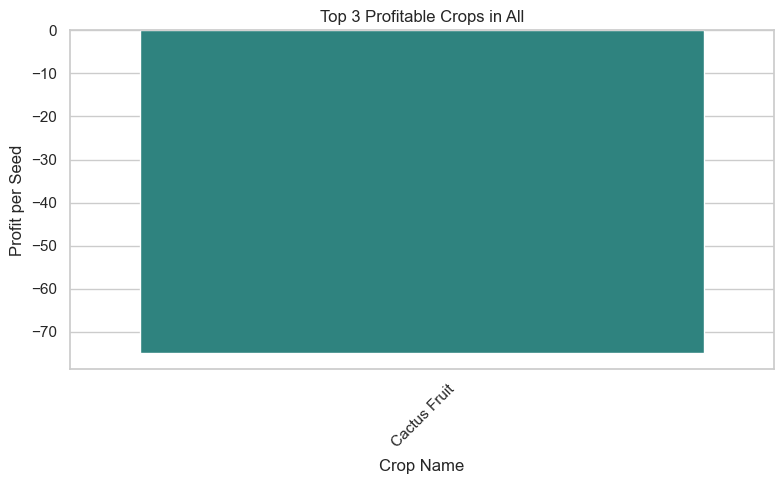

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_20925/3601460456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')


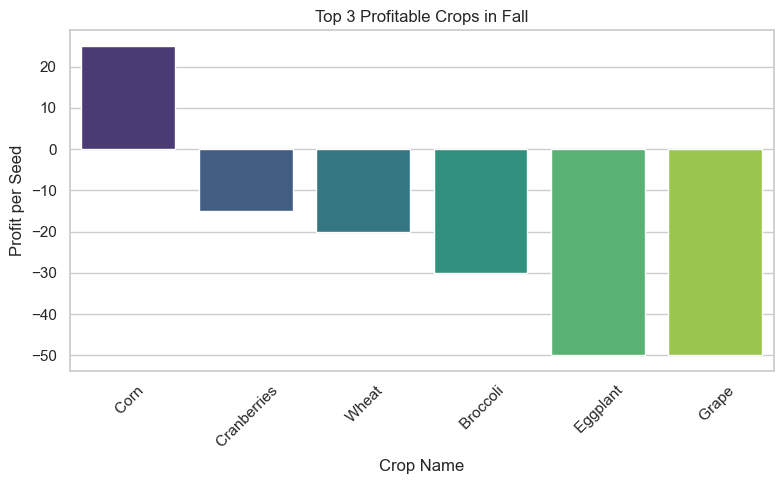

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_20925/3601460456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')


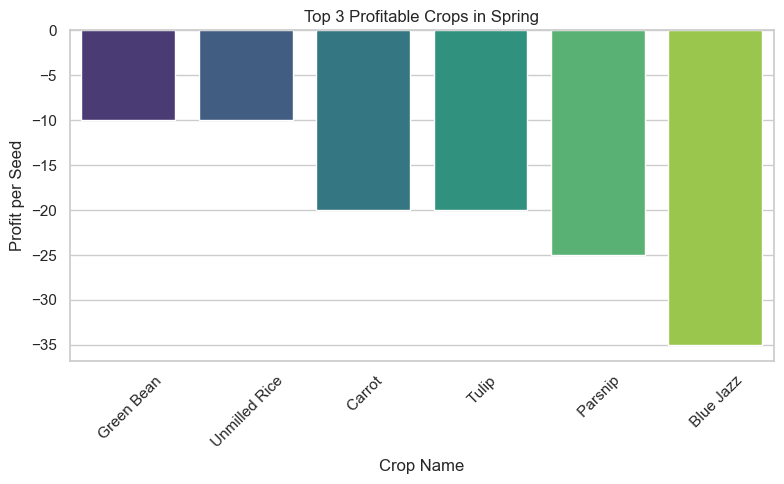

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_20925/3601460456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')


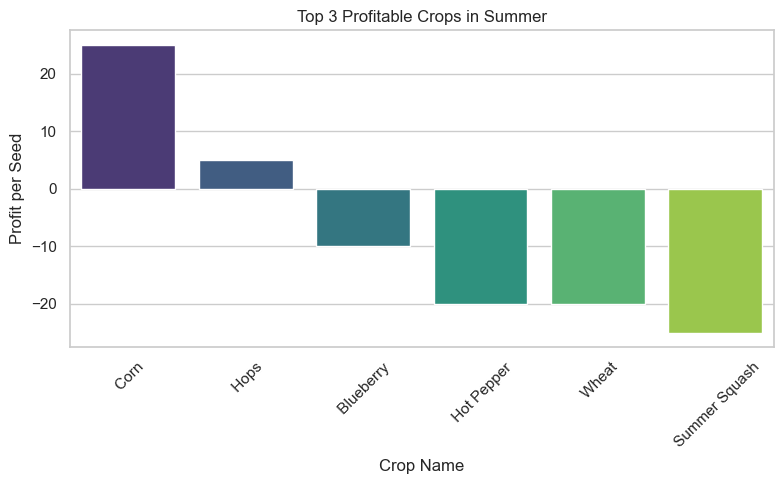

/var/folders/mh/sbxfmlvn4yqc0hyzdx_ghl5m0000gn/T/ipykernel_20925/3601460456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')


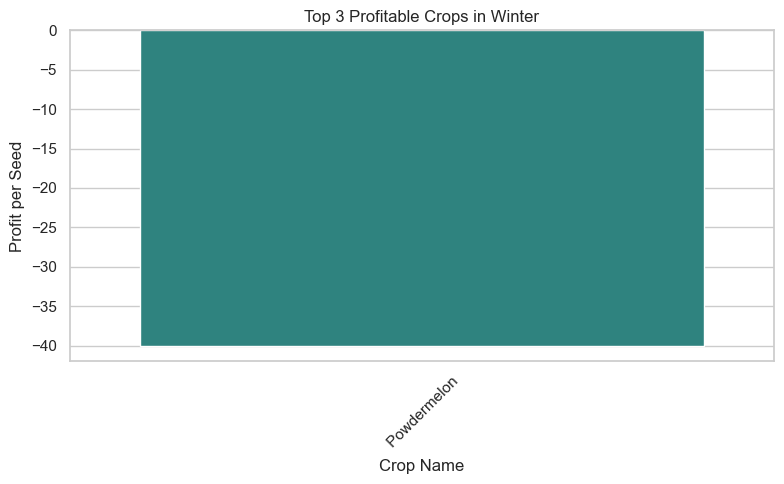

In [30]:
# Visualize Top Crops per Season
sns.set(style="whitegrid")
seasons = top_crops_per_season['Season'].unique()

for season in seasons:
    season_df = top_crops_per_season[top_crops_per_season['Season'] == season]
    plt.figure(figsize=(8, 5))
    sns.barplot(data=season_df, x='Name', y='Profit', palette='viridis')
    plt.title(f'Top 3 Profitable Crops in {season}')
    plt.xlabel('Crop Name')
    plt.ylabel('Profit per Seed')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show();